## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [7]:
df=pd.read_csv('car-sales-extended-missing-data.csv')
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [9]:
df.shape

(1000, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [14]:
df.duplicated().sum()

1

In [15]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## EDA(Exploratorry Data Analysis) & Feature Engineering

<Axes: >

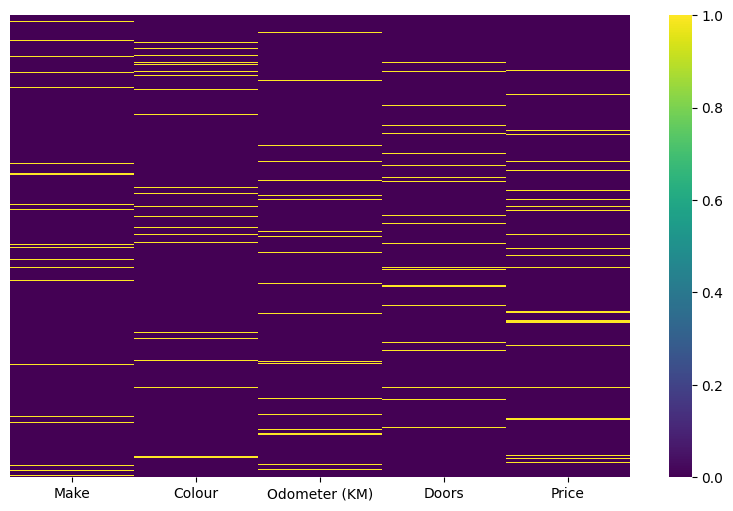

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),yticklabels=False,cmap='viridis')

In [25]:
df.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [26]:
df['Make'].value_counts()

Make
Toyota    379
Honda     292
Nissan    183
BMW        97
Name: count, dtype: int64

In [27]:
df['Colour'].value_counts()

Colour
White    390
Blue     302
Black     95
Red       88
Green     75
Name: count, dtype: int64

## Barplot Of The Make and Color Columns

<Axes: xlabel='Make', ylabel='count'>

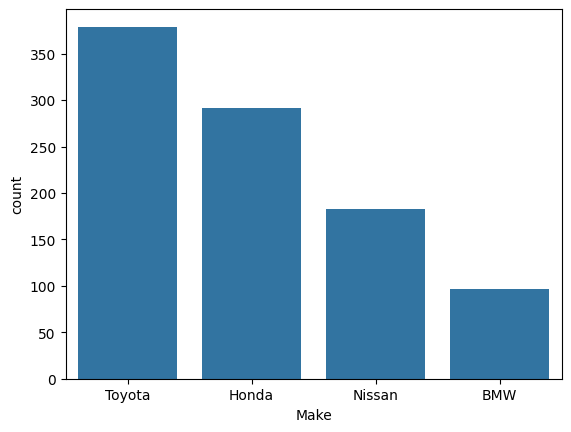

In [28]:
sns.barplot(df['Make'].value_counts())

<Axes: xlabel='Colour', ylabel='count'>

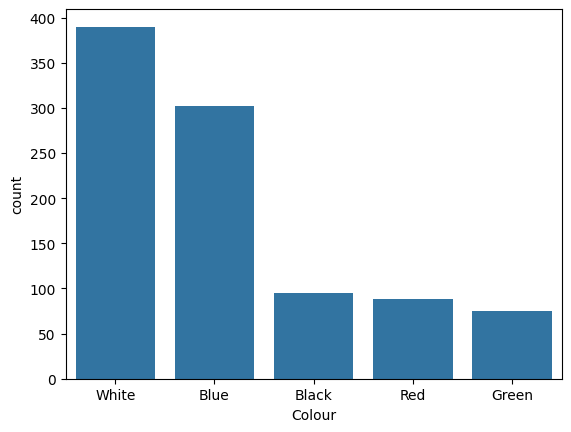

In [31]:
sns.barplot(df['Colour'].value_counts())

# Histogram OF Price

In [32]:
df.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

Text(0.5, 1.0, 'Price Distribution')

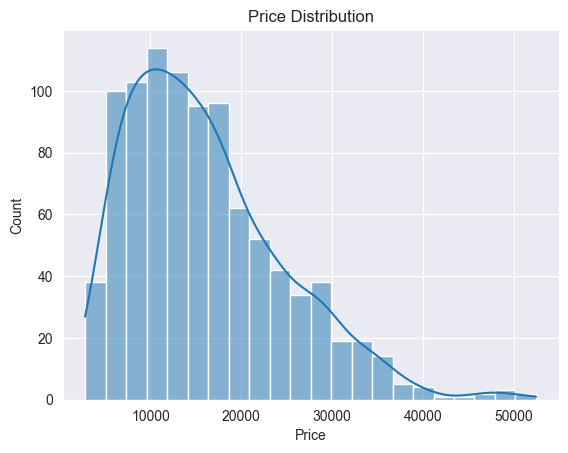

In [45]:
sns.set_style('darkgrid')
sns.histplot(df['Price'],kde=True)
plt.title('Price Distribution')

# Correlation Plot

In [47]:
corr=df.corr(numeric_only=True)
corr

,Odometer (KM),Doors,Price
Odometer (KM),1.000000,-0.027037,-0.405649
Doors,-0.027037,1.000000,0.243104
Price,-0.405649,0.243104,1.000000


<Axes: >

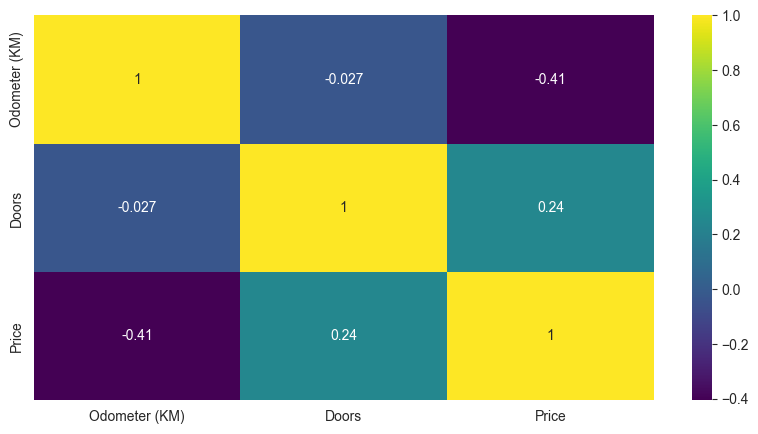

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='viridis')

## Handling Missing Values

In [52]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
df['Odometer (KM)'].fillna(df['Odometer (KM)'].median(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5824\3754981751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Odometer (KM)'].fillna(df['Odometer (KM)'].median(), inplace=True)


In [54]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [63]:
df['Doors']=df['Doors'].fillna(df['Doors'].median())
df['Price']=df['Price'].fillna(df['Price'].median())

In [70]:
df['Colour']=df['Colour'].fillna(df['Colour'].mode().values[0])
df['Make']=df['Make'].fillna(df['Make'].mode().values[0])

In [71]:
df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

## MOdelling 

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet


# 4. Building Multiple Linear Regression Model
print("\nBuilding and training Multiple Linear Regression model...")
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lin = lin_reg.predict(X_test)

# Print the coefficients and intercept
print("\nLinear Regression Coefficients:")
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

# Match coefficients to the feature names
for feature, coef in zip(X.columns, lin_reg.coef_):
    print(f"{feature}: {coef}")

print("\nMultiple Linear Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lin)}")


# Predictions and evaluation
y_pred_lin = lin_reg.predict(X_test)
print("\nMultiple Linear Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lin)}")


# 5. Polynomial Regression
print("\nBuilding Polynomial Regression model...")
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions and evaluation
y_pred_poly = poly_reg.predict(X_test_poly)
print("\nPolynomial Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_poly)}")


# 6. Lasso Regression
print("\nBuilding Lasso Regression model...")
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lasso = lasso.predict(X_test)
print("\nLasso Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso)}")


# 7. Ridge Regression
print("\nBuilding Ridge Regression model...")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred_ridge = ridge.predict(X_test)
print("\nRidge Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge)}")


# 8. Random Forest Regressor
print("\nBuilding Random Forest Regressor model...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")


# 9. SVM Regressor
print("\nBuilding Support Vector Regressor (SVM) model...")
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm_reg.predict(X_test)
print("\nSVM Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_svm)}")


# 10. Decision Tree Regressor
print("\nBuilding Decision Tree Regressor model...")
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tree = tree_reg.predict(X_test)
print("\nDecision Tree Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_tree)}")



# Building Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train, y_train)

# Predictions and evaluation
y_pred_elastic = elastic_net.predict(X_test)

print("\nElastic Net Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_elastic)}")




# 11. Model Evaluation Metrics Comparison (MAE)
print("\nComparing Models' Performance:")
models = ['Linear Regression', 'Polynomial Regression', 'Lasso', 'Ridge', 'Elastic Net', 'Random Forest', 'SVM', 'Decision Tree']
mae_values = [
    mean_absolute_error(y_test, y_pred_lin),
    mean_absolute_error(y_test, y_pred_poly),
    mean_absolute_error(y_test, y_pred_lasso),
    mean_absolute_error(y_test, y_pred_ridge),
    mean_absolute_error(y_test, y_pred_elastic),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_svm),
    mean_absolute_error(y_test, y_pred_tree)
]



for model, mae in zip(models, mae_values):
    print(f"{model} - MAE: {mae:.2f}")
